In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split


In [50]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [51]:
df.shape

(4026, 7)

In [52]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [54]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [55]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [56]:
y=normalized_df["Period (P)"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# GradientBoostingRegressor

In [58]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split




def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 800, 1500, step=50)
    max_depth = trial.suggest_int('max_depth',3,10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',2,20)
    learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
   
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_leaf=min_samples_leaf
        
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse
# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)
print('Best RMSE: {:.2f}'.format(study.best_value))
print('Best parameters: {}'.format(study.best_params))

[I 2024-01-14 19:58:08,495] A new study created in memory with name: no-name-9d18abcd-9cb0-4704-91ac-6f4bb968ab0c
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 19:58:10,912] Trial 0 finished with value: 0.004903582519792563 and parameters: {'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 20, 'learning_rate': 0.21178687427258505}. Best is trial 0 with value: 0.004903582519792563.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning

[I 2024-01-14 19:58:56,000] Trial 14 finished with value: 0.004453592312530962 and parameters: {'n_estimators': 900, 'max_depth': 5, 'min_samples_leaf': 5, 'learning_rate': 0.2794323305146079}. Best is trial 14 with value: 0.004453592312530962.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 19:58:59,861] Trial 15 finished with value: 0.004421354523558043 and parameters: {'n_estimators': 1350, 'max_depth': 5, 'min_samples_leaf': 16, 'learning_rate': 0.3176065392543397}. Best is trial 15 with value: 0.004421354523558043.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 19:59:51,951] Trial 29 finished with value: 0.006858789302365208 and parameters: {'n_estimators': 1300, 'max_depth': 3, 'min_samples_leaf': 7, 'learning_rate': 0.4353118889333302}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 19:59:56,318] Trial 30 finished with value: 0.0053517136732842505 and parameters

[I 2024-01-14 20:00:45,926] Trial 43 finished with value: 0.004323808315133317 and parameters: {'n_estimators': 1400, 'max_depth': 4, 'min_samples_leaf': 6, 'learning_rate': 0.443367936454943}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 20:00:49,353] Trial 44 finished with value: 0.004448462038791022 and parameters: {'n_estimators': 1300, 'max_depth': 5, 'min_samples_leaf': 3, 'learning_rate': 0.4831134538021438}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 20:01:26,974] Trial 58 finished with value: 0.0042597044861434705 and parameters: {'n_estimators': 1350, 'max_depth': 4, 'min_samples_leaf': 12, 'learning_rate': 0.3924558915090508}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 20:01:29,813] Trial 59 finished with value: 0.004565568579478719 and parameter

[I 2024-01-14 20:01:59,059] Trial 72 finished with value: 0.004185123172407153 and parameters: {'n_estimators': 1500, 'max_depth': 4, 'min_samples_leaf': 11, 'learning_rate': 0.4861693632536325}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 20:02:01,407] Trial 73 finished with value: 0.004533371628433595 and parameters: {'n_estimators': 1500, 'max_depth': 4, 'min_samples_leaf': 11, 'learning_rate': 0.4926241945049881}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. 

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 20:02:32,996] Trial 87 finished with value: 0.004276949628258154 and parameters: {'n_estimators': 1450, 'max_depth': 4, 'min_samples_leaf': 15, 'learning_rate': 0.4059191524729531}. Best is trial 27 with value: 0.004037891779648215.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_22444\1191376099.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.5)
[I 2024-01-14 20:02:35,935] Trial 88 finished with value: 0.004238916812789912 and parameters

Total time taken:  293.0320954322815
Best RMSE: 0.00
Best parameters: {'n_estimators': 1450, 'max_depth': 4, 'min_samples_leaf': 11, 'learning_rate': 0.4123125410452746}


In [59]:
from sklearn.ensemble import GradientBoostingRegressor
params_best['n_estimators'] = int(params_best['n_estimators'])
params_best['max_depth'] = int(params_best['max_depth'])
params_best['min_samples_leaf'] = int(params_best['min_samples_leaf'])
gbr_reg= GradientBoostingRegressor(**best_params)

gbr_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2217, max_depth=5,
                          min_samples_leaf=10, n_estimators=1450)

In [60]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
y_pred= gbr_reg.predict(X_test)
y_pred1=gbr_reg.predict(X_val)
y_pred2=gbr_reg.predict(X_train)

In [62]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.0017678192074297597
mean_squared_error: 8.387982646372954e-06
rmse: 0.002896201416747971
r2 score: 0.9998317652857095


In [63]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.0005948550750207269
mean_squared_error: 1.71255916481533e-06
rmse: 0.001308647838348931
r2 score: 0.9999649892910784


In [64]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.0018959168599108254
mean_squared_error: 2.146142889710797e-05
rmse: 0.004632648151663147
r2 score: 0.9995810823560564


In [65]:
from yellowbrick.regressor import PredictionError

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


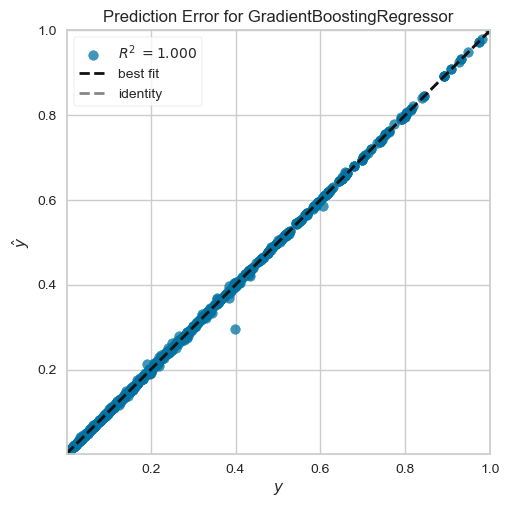

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [66]:
visualizer = PredictionError(gbr_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()